In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly
from plotnine import *



In [22]:
results_mpc = pd.read_csv('optimal_bidding_bis/results/mpc_results_def.csv')
results_mpc['timestamp'] = pd.to_datetime(results_mpc['timestamp'])

results_nn = pd.read_csv('optimal_bidding_bis/results/hybrid_rl_results_def.csv')
results_nn['timestamp'] = pd.to_datetime(results_nn['timestamp'])

start = pd.Timestamp(year=2018,
                     month=10,
                     day=28,
                     hour=0,
                     minute=0)
end = pd.Timestamp(year=2018,
                     month=10,
                     day=30,
                     hour=0,
                     minute=0)

results_mpc_short = results_mpc[(results_mpc['timestamp'] > start) & (results_mpc['timestamp'] < end)]
results_nn_short = results_nn[(results_nn['timestamp'] > start) & (results_nn['timestamp'] < end)]

In [23]:
results_nn

,Unnamed: 0,b_fcas_power,b_fcas_price,b_fcas_type,b_fcas_actor_power,b_fcas_actor_price,b_en_actor_power,b_en_power_gen,b_en_power_load,b_en_price,...,fcas_clearing_price,en_price,r,current_state_value,next_state_value,fcas_demand,soe,timestamp,k,delta
0,0,46.05535,41.000000,gen,3.874165,-0.314283,2.030499,0.0,300.000000,54.90,...,41.000000,54.90,-16101.012895,-160.965973,-15.090668,41.00,0.000000,2018-06-01 04:30:00,0.0,-16112.47000
1,1,66.31312,41.000000,gen,1.665301,-1.074649,13.283922,0.0,300.000000,56.19,...,41.000000,56.19,-16488.012895,-293.572388,-160.965973,41.00,295.000175,2018-06-01 05:00:00,0.0,-16479.96500
2,2,122.000725,41.000000,gen,5.804046,3.831633,44.470318,0.0,300.000000,58.73,...,41.000000,58.73,-178250.362347,-2017.214233,-293.572388,41.00,590.000349,2018-06-01 05:30:00,0.0,-178235.67000
3,3,200.0,41.670000,gen,15.012062,17.090618,93.441826,0.0,243.999480,62.98,...,41.669998,62.98,-264301.249385,-4255.774414,-2017.214233,41.67,885.000524,2018-06-01 06:00:00,0.0,-264200.38000
4,4,200.0,47.670000,gen,44.327183,32.088036,136.424350,0.0,100.000000,74.24,...,47.669998,74.24,-115042.990140,-4552.920898,-4255.774414,47.67,1029.000000,2018-06-01 06:30:00,0.0,-114830.20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7283,7283,116.076584,73.505040,gen,115.516990,73.580170,34.487700,0.0,33.513313,95.60,...,63.000000,95.60,-3203.867215,-122.688095,-113.382645,58.91,461.912778,2018-10-30 22:00:00,1.0,-3198.19820
7284,7284,117.4143,71.090004,gen,117.266390,71.494390,27.267681,0.0,26.574670,152.80,...,70.000000,152.80,-4060.642462,-138.695541,-122.688095,67.32,495.426049,2018-10-30 22:30:00,1.0,-4054.50830
7285,7285,109.52747,61.928406,gen,109.990950,63.886200,19.084044,0.0,18.814710,134.27,...,61.928406,134.27,-1277.913482,-123.666222,-138.695541,53.40,522.000976,2018-10-30 23:00:00,1.0,-1270.97860
7286,7286,103.27323,58.995827,gen,104.784454,58.741573,17.877808,0.0,19.216790,111.20,...,58.995827,111.20,-1340.615532,-112.277313,-123.666222,46.00,529.616933,2018-10-30 23:30:00,1.0,-1334.43210


In [24]:
def compute_reward_mpc(results):
    reward = []
    for i in range(len(results)):
        r = (results['battery_bid_energy_power_gen'].iloc[i] - results['battery_bid_energy_power_load'].iloc[i]) * results['battery_bid_energy_price'].iloc[i]
        if results['battery_bid_fcas_price'].iloc[i] <= results['fcas_clearing_price'].iloc[i]:
            r += abs(results['battery_bid_fcas_price'].iloc[i] * results['battery_bid_fcas_power'].iloc[i])
        reward.append(r)
    results['reward'] = reward
    return results

def compute_reward_nn(results):
    reward = []
    for i in range(len(results)):
        r = (results['b_en_power_gen'].iloc[i] - results['b_en_power_load'].iloc[i]) * results['b_en_price'].iloc[i]
        if results['b_fcas_price'].iloc[i] <= results['fcas_clearing_price'].iloc[i]:
            r += abs(results['b_fcas_price'].iloc[i] * np.float(results['b_fcas_power'].iloc[i]))
        reward.append(r)
    results['reward'] = reward
    return results

In [25]:
results_mpc = compute_reward_mpc(results_mpc)
results_nn = compute_reward_nn(results_nn)

print(results_mpc['reward'].sum())
print(results_nn['reward'].sum())

ValueError: could not convert string to float: 'tensor(-1.0104e-07)'

In [26]:
cumulative_reward_mpc = results_mpc['r'].rolling(window=48).mean()
cumulative_reward_nn = results_nn['r'].rolling(window=48).mean()
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=results_mpc['timestamp'], y=cumulative_reward_mpc, name='reward MPC'), secondary_y=False)
fig.add_trace(go.Scatter(x=results_nn['timestamp'], y=cumulative_reward_nn, name='reward SAC'), secondary_y=False)


fig.update_layout(
    font=dict(family='Courier New, monospace', size=18, color='black'),
    legend_orientation="h",
    legend=go.layout.Legend(
        x=0.76,
        y=0,
        traceorder="normal",
        font=dict(
            family="Courier New, monospace",
            size=17,
        )),
    )

# Set x-axis title
fig.update_xaxes(title_text="Hours of day")

# Set y-axes titles
fig.update_yaxes(title_text="Cumulative Reward")
fig.show()

KeyError: 'r'

In [27]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=results_nn['timestamp'], y=results_nn['k'], name='k'), secondary_y=False)

# Add figure title
fig.update_layout(
    font=dict(family='Courier New, monospace', size=18, color='black'),
    legend_orientation="h",
    legend=go.layout.Legend(
        x=0.76,
        y=0,
        traceorder="normal",
        font=dict(
            family="Courier New, monospace",
            size=17,
        )),
    )

# Set x-axis title
fig.update_xaxes(title_text="Hours of day")

# Set y-axes titles
fig.update_yaxes(title_text="Risk Factor")

fig.show()


## two figures for MPC
## two figures for SAC 
## 



In [28]:
results_mpc_short.head()



,Unnamed: 0,battery_bid_fcas_power,battery_bid_fcas_price,battery_bid_fcas_type,battery_bid_energy_power_gen,battery_bid_energy_power_load,battery_bid_energy_price,battery_bid_energy_type,fcas_clearing_price,energy_price,raise_demand,raise_price,soe,timestamp
7144,7144,1.690501e-07,54.00,gen,-3.000002e+02,0.000000,192.25,gen,63.0,192.25,54.00,8.95,3.000002e+02,2018-10-28 00:30:00
7145,7145,5.072525e-09,56.67,gen,-1.448780e-08,0.000000,152.54,gen,63.0,152.54,56.67,8.90,0.000000e+00,2018-10-28 01:00:00
7146,7146,1.289225e-08,61.00,gen,-1.001274e-04,0.000000,121.79,gen,63.0,121.79,61.00,9.00,1.002181e-04,2018-10-28 01:30:00
7147,7147,1.199590e-08,41.00,gen,0.000000e+00,299.999998,114.93,load,63.0,114.93,41.00,12.80,9.379934e-08,2018-10-28 02:00:00
7148,7148,1.068260e-08,41.00,gen,0.000000e+00,299.999994,95.74,load,63.0,95.74,41.00,9.00,3.000000e+02,2018-10-28 02:30:00


In [29]:
results_nn_short.head()

,Unnamed: 0,b_fcas_power,b_fcas_price,b_fcas_type,b_fcas_actor_power,b_fcas_actor_price,b_en_actor_power,b_en_power_gen,b_en_power_load,b_en_price,...,fcas_clearing_price,en_price,r,current_state_value,next_state_value,fcas_demand,soe,timestamp,k,delta
7144,7144,100.63656,29.631628,gen,100.739350,30.291252,-14.790758,-15.892646,0.0,192.25,...,29.631628,192.25,3668.686439,38.399059,2.141586,54.00,711.758288,2018-10-28 00:30:00,1.0,3668.5793
7145,7145,103.40986,30.768515,gen,103.277405,31.609490,-15.011230,-13.612753,0.0,152.54,...,30.768515,152.54,2787.290374,58.572960,38.399059,56.67,684.366569,2018-10-28 01:00:00,1.0,2785.3700
7146,7146,108.30596,33.733696,gen,105.807400,34.082726,-14.854885,-15.031810,0.0,121.79,...,33.733696,121.79,2741.583505,74.244942,58.572960,61.00,657.919610,2018-10-28 01:30:00,1.0,2738.6548
7147,7147,96.89601,31.618677,gen,96.843240,31.654810,-12.954996,-13.946999,0.0,114.93,...,31.618677,114.93,1887.490900,78.233749,74.244942,41.00,627.886983,2018-10-28 02:00:00,1.0,1883.7786
7148,7148,92.35142,31.329860,gen,95.100860,31.527481,-12.287342,-12.931296,0.0,95.74,...,31.329861,95.74,1520.024462,77.748131,78.233749,41.00,608.940085,2018-10-28 02:30:00,1.0,1516.1127


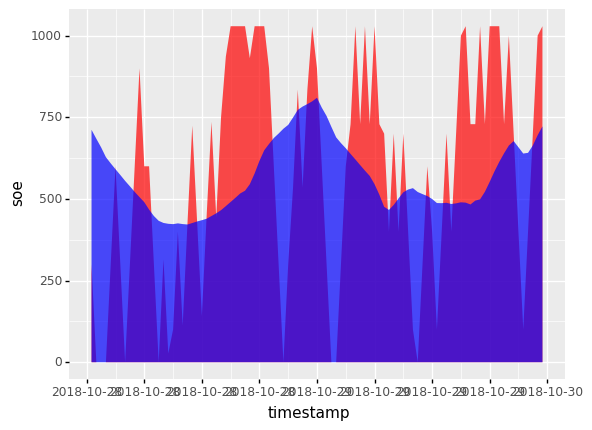

<ggplot: (319403949)>

In [30]:


(ggplot()
     +geom_area(results_mpc_short, aes(x='timestamp', y = "soe"), alpha = .7, fill = "red")
    +geom_area(results_nn_short, aes(x='timestamp', y = "soe"), alpha = .7, fill = "blue"))

In [31]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=results_nn['timestamp'], y=results_nn['k'], name='k'), secondary_y=False)

# Add figure title
fig.update_layout(
    font=dict(family='Courier New, monospace', size=18, color='black'),
    legend_orientation="h",
    legend=go.layout.Legend(
        x=0.76,
        y=0,
        traceorder="normal",
        font=dict(
            family="Courier New, monospace",
            size=17,
        )),
    )

# Set x-axis title
fig.update_xaxes(title_text="Hours of day")

# Set y-axes titles
fig.update_yaxes(title_text="Risk Factor")

fig.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



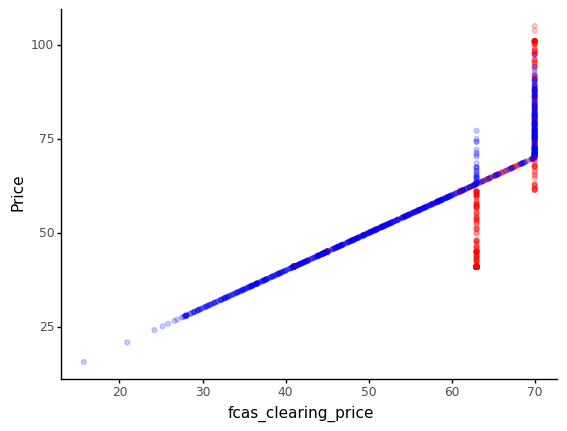

<ggplot: (319327321)>

In [32]:

start = pd.Timestamp(year=2018,
                     month=10,
                     day=15,
                     hour=0,
                     minute=0)
end = pd.Timestamp(year=2018,
                     month=10,
                     day=30,
                     hour=0,
                     minute=0)

results_mpc_short = results_mpc[(results_mpc['timestamp'] > start) & (results_mpc['timestamp'] < end)]
results_nn_short = results_nn[(results_nn['timestamp'] > start) & (results_nn['timestamp'] < end)]

results_nn_short["b_fcas_power"] = [float(i) for i in results_nn_short["b_fcas_power"]]

(ggplot()
    + geom_point(results_mpc_short, 
                 aes("fcas_clearing_price","battery_bid_fcas_price"), 
                 color = "red",
                alpha=.2)
    + geom_point(results_nn_short, 
                 aes("fcas_clearing_price","b_fcas_price"), 
                 color = "blue",
                alpha= .2)
    + ylab("Price")
    + theme_classic()
    )

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



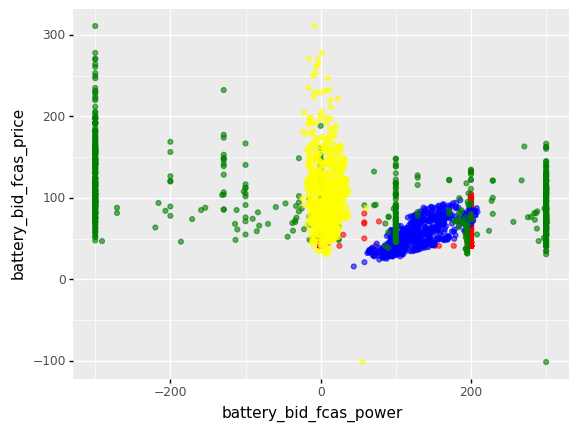

<ggplot: (319509081)>

In [33]:
results_mpc_short["combined_bid_energy_power"] = \
     results_mpc_short["battery_bid_energy_power_load"].values + \
    results_mpc_short["battery_bid_energy_power_gen"].values
                                                                   

(ggplot(results_mpc_short)
    + geom_point(aes(x="battery_bid_fcas_power", y ="battery_bid_fcas_price"), 
                 color = "red",
                alpha = .6)
    + geom_point(data= results_nn_short, 
                 mapping=aes("b_fcas_actor_power", "b_fcas_price"),
                color = "blue",
                alpha=.6)
    + geom_point(data = results_mpc_short,
                mapping=aes(x="combined_bid_energy_power", y ="battery_bid_energy_price"), 
                 color = "green",
                alpha = .6)
    + geom_point(data = results_nn_short,
                mapping=aes(x="b_en_actor_power", y ="b_en_price"), 
                 color = "yellow",
                alpha = .6))

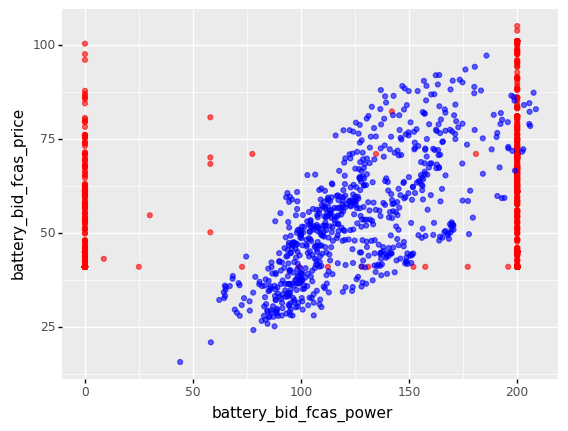

<ggplot: (319403849)>

In [34]:
(ggplot(results_mpc_short)
    + geom_point(aes(x="battery_bid_fcas_power", y ="battery_bid_fcas_price"), 
                 color = "red",
                alpha = .6)
    + geom_point(data= results_nn_short, 
                 mapping=aes("b_fcas_actor_power", "b_fcas_price"),
                color = "blue",
                alpha=.6))

In [35]:
type(results_nn_short.b_fcas_power.values[0])

numpy.float64

## Power vs. price for fcas and energy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



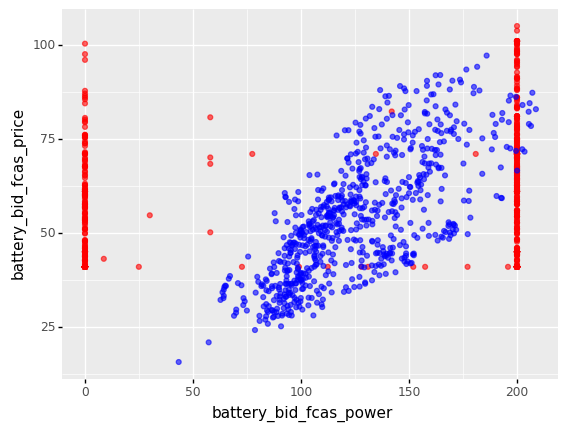

<ggplot: (319505621)>

In [36]:
## plot 1

results_nn_short["b_fcas_power"] = [float(i) for i in results_nn_short["b_fcas_power"]]

(ggplot()
    + geom_point(data= results_mpc_short, 
                 mapping= aes(x="battery_bid_fcas_power", y ="battery_bid_fcas_price"), 
                 color = "red",
                alpha = .6)
    + geom_point(data=results_nn_short, 
                 mapping = aes(x="b_fcas_power", y ="b_fcas_price"),
                 color = "blue",
                alpha = .6)
)




/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



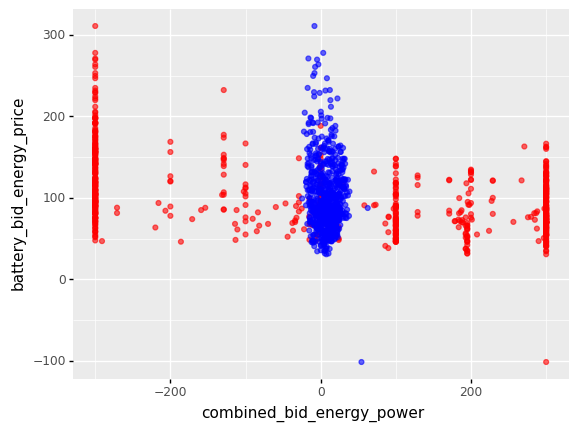

<ggplot: (319507445)>

In [37]:
## Plot 2 
results_mpc_short["combined_bid_energy_power"] = \
     results_mpc_short["battery_bid_energy_power_load"].values + \
    results_mpc_short["battery_bid_energy_power_gen"].values
   
results_nn_short["b_en_power_combined"] = \
     results_nn_short["b_en_power_load"].values + \
    results_nn_short["b_en_power_gen"].values
            

(ggplot()
    + geom_point(data= results_mpc_short, 
                 mapping= aes(x="combined_bid_energy_power", y ="battery_bid_energy_price"), 
                 color = "red",
                alpha = .6)
    + geom_point(data=results_nn_short, 
                 mapping = aes(x="b_en_power_combined", y ="b_en_price"),
                 color = "blue",
                alpha = .6)
)


## Price by demand for fcas and energy

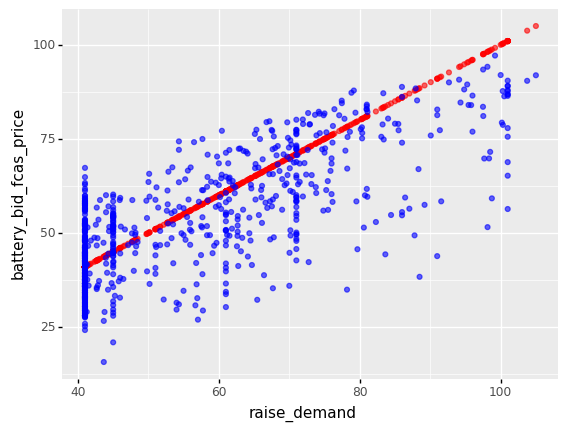

<ggplot: (319509057)>

In [38]:


(ggplot()
    + geom_point(data= results_mpc_short, 
                 mapping= aes(x="raise_demand", y ="battery_bid_fcas_price"), 
                 color = "red",
                alpha = .6)
    + geom_point(data=results_nn_short, 
                 mapping = aes(x="fcas_demand", y ="b_fcas_price"),
                 color = "blue",
                alpha = .6)
)


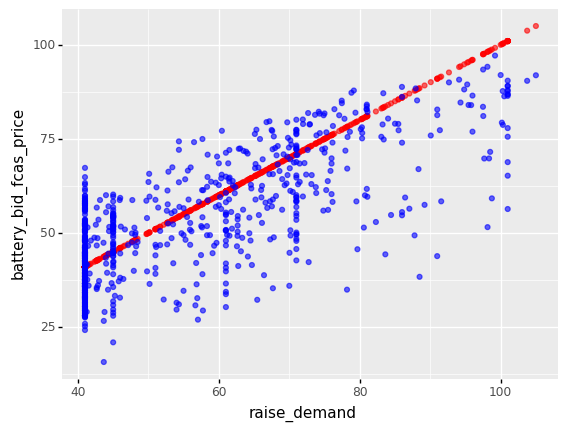

<ggplot: (319725345)>

In [39]:


(ggplot()
    + geom_point(data= results_mpc_short, 
                 mapping= aes(x="raise_demand", y ="battery_bid_fcas_price"), 
                 color = "red",
                alpha = .6)
    + geom_point(data=results_nn_short, 
                 mapping = aes(x="fcas_demand", y ="b_fcas_price"),
                 color = "blue",
                alpha = .6)
)



## ...Just kidding, not by energy. Below are some more exploratory plots.

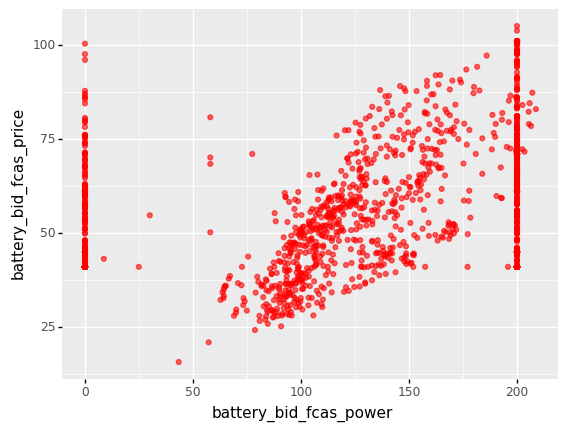

<ggplot: (319753325)>

In [40]:
(ggplot()
    + geom_point(data= results_mpc_short, 
                 mapping= aes(x="battery_bid_fcas_power", y ="battery_bid_fcas_price"), 
                 color = "red",
                alpha = .6)
    + geom_point(data=results_nn_short, 
                 mapping = aes(x="b_fcas_power", y ="b_fcas_price"), 
                 color = "red",
                alpha = .6)
)

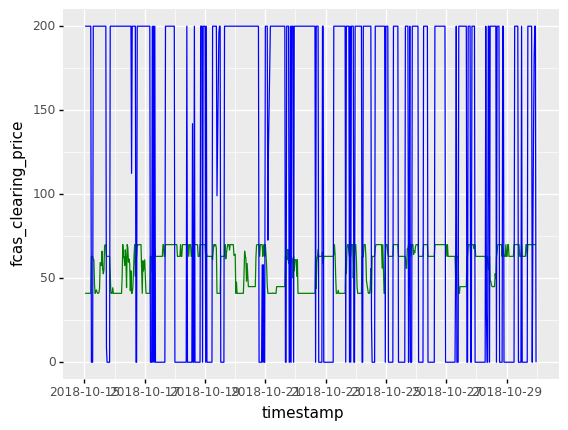

<ggplot: (319707609)>

In [41]:
(ggplot(results_mpc_short)
    + geom_line(aes("timestamp", "fcas_clearing_price"), color = "green")
    + geom_line(aes("timestamp", "battery_bid_fcas_power"), color = "blue")
)

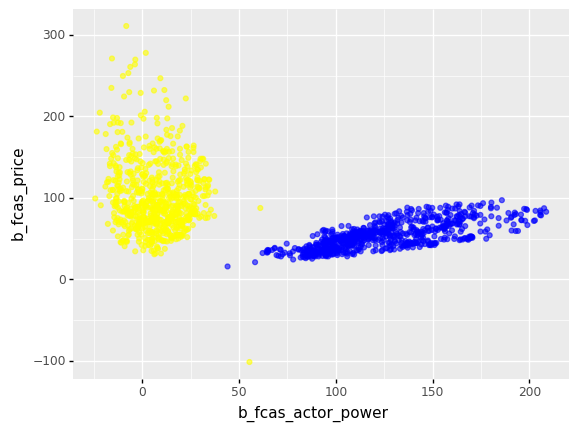

<ggplot: (319802253)>

In [42]:
(ggplot(results_mpc_short)
    + geom_point(data= results_nn_short, 
                 mapping=aes("b_fcas_actor_power", "b_fcas_price"),
                color = "blue",
                alpha=.6)
    + geom_point(data = results_nn_short,
                mapping=aes(x="b_en_actor_power", y ="b_en_price"), 
                 color = "yellow",
                alpha = .6))

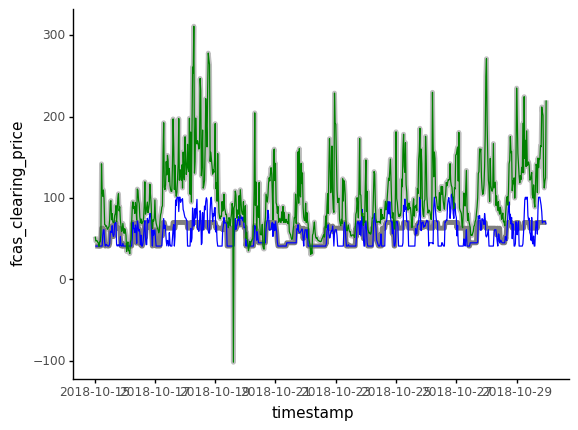

<ggplot: (319854657)>

In [43]:
(ggplot(results_mpc_short)
    + geom_line(aes("timestamp", "fcas_clearing_price"), color = "black", size = 2, alpha = .5)
    + geom_line(aes("timestamp", "energy_price"), color = "grey", size = 2, alpha = .5)
    + geom_line(aes("timestamp", "battery_bid_fcas_price"), color = "blue")
    + geom_line(aes("timestamp", "battery_bid_energy_price"), color = "green")
     +theme_classic()
)

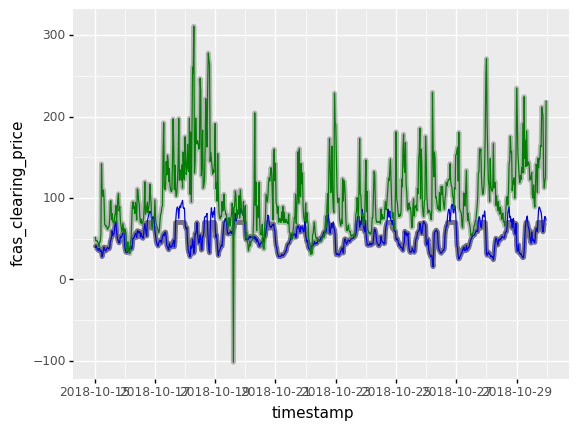

<ggplot: (319835429)>

In [44]:
(ggplot(results_nn_short)
    + geom_line(aes("timestamp", "fcas_clearing_price"), color = "black", size = 2, alpha = .5)
    + geom_line(aes("timestamp", "en_price"), color = "grey", size = 2, alpha = .5)
    + geom_line(aes("timestamp", "b_fcas_price"), color = "blue")
    + geom_line(aes("timestamp", "b_en_price"), color = "green")
)